<a href="https://colab.research.google.com/github/Akash-Samanta/ML-mini-Projects/blob/main/knn_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*KNN* 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x=data.iloc[:,2:4].values

In [ ]:
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)


In [ ]:
np.sqrt(x_train.shape[0])

17.88854381999832

In [ ]:
k=17

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95

In [ ]:
 from sklearn.metrics import confusion_matrix 
 confusion_matrix(y_test, y_pred)

array([[46,  4],
       [ 0, 30]])

In [ ]:
accuracy=[]
for i in range(1,26):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  accuracy.append(accuracy_score(y_test, knn.predict(x_test)))

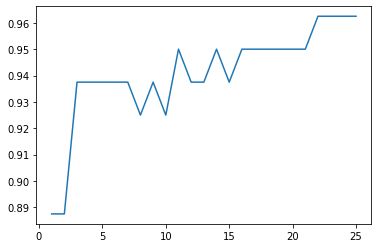

In [ ]:
plt.plot(range(1,26), accuracy)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.95

In [ ]:
def predict_output():
  age = int(input("Enter the age"))
  salary= int(input("Enter the salary"))

  x_new= np.array([[age],[salary]]).reshape(1,2)
  x_new= scaler.transform(x_new)

  if knn.predict(x_new)[0]==0:
    return "Will not purchase"
  else:
    return "Will purchase"

In [ ]:
predict_output()


Enter the age26
Enter the salary45000


'Will not purchase'

Creating a sample meshgrid

In [ ]:
x=np.array([1,2,3])
y=np.array([4,5,6,7])
xx, yy=np.meshgrid(x,y)

Plotting a function using meshgrid

In [ ]:
x=np.linspace(-40,40,1000)
y=np.linspace(-50,50,900)
xx,yy=np.meshgrid(x,y)

In [ ]:
z=np.random.random((900,1000))

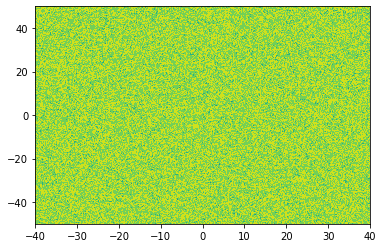

In [ ]:
plt.contourf(xx,yy,z)

Creating a Meshgrid


In [ ]:
a=np.arange(start=x_train[:,0].min()-1, stop=x_train[:,0].max()+1, step =0.01)
b=np.arange(start=x_train[:,1].min()-1, stop =x_train[:,1].max()+1, step=0.01)

xx,yy=np.meshgrid(a,b)

Classifying every point on the Meshgrid

In [ ]:
input_array=np.array([xx.ravel(), yy.ravel()]).T
labels=knn.predict(input_array)

Plotting the array as an Image

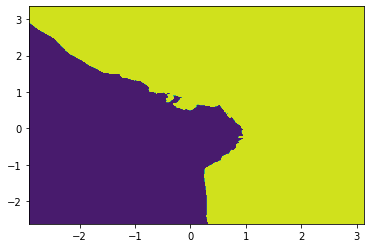

In [ ]:
plt.contourf(xx,yy,labels.reshape(xx.shape))

Plotting all the training data on the spot

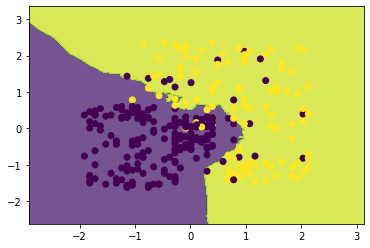

In [ ]:
plt.contourf(xx,yy,labels.reshape(xx.shape), alpha=0.75)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)